# SaaSquatch Videos: Interview EDA

#### In this notebook, I will conduct an initial exploration and analysis of a given dataset of four tables, listed below:

##### 1. Leads
##### 2. Trials
##### 3. Cancellations
##### 4. Watched Videos

### Steps to Exploratory Analysis
#### 1. Import libraries and data
#### 2. Initial Exploration of Each Table
#### 3. Merge Relevant Datasets to Answer Main Project Question: User Engagement for Dare Network

### 1. Import Datasets

In [6]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import matplotlib

In [7]:
#Set Path
path = r'/Users/tristansavella/Project_B2CSAAS'

In [8]:
#Import Datasets
cancellations = pd.read_csv(os.path.join(path, 'data', 'cancellations.csv'), index_col = False)
leads = pd.read_csv(os.path.join(path, 'data', 'leads.csv'), index_col = False)
trials = pd.read_csv(os.path.join(path, 'data', 'trials.csv'), index_col = False)
videos_watched = pd.read_csv(os.path.join(path, 'data', 'videos_watched.csv'), index_col = False)

In [9]:
#Show all columns
pd.set_option('display.max_columns', None)

In [10]:
#Show all rows
pd.set_option('display.max_rows', None)

### 2. Initial Exploration

#### 2A. Cancellations

In [13]:
cancellations.head()

,subscription_key,email_key,cancelled_at
0,03b9565e8ea01ab562104a602724b9bf,83f70ec46606509f8f90ef12a14343b2,2023-12-01 09:54:48.000 Z
1,3170cbc412ac4f9112a2df24e535c6e8,06b233b0ef30db640424af06397b4d7f,2023-12-02 05:57:52.000 Z
2,cc9e4dcdf8ae079fd7fe0d79234d5739,ee5d1525b19abe948eb13538ac28ecf8,2023-12-02 06:53:27.000 Z
3,268afb88051559587e529f704153c528,4a009f770283dad1b373075057e96d23,2023-12-02 14:19:22.000 Z
4,de174b27b963e4be9b3c7b29caf8b5c7,6a602ec029c1f56c720043c565fc4a3c,2023-12-02 15:56:12.000 Z


In [14]:
#Checking for missing values
cancellations.isnull().sum()
#No Null Values

subscription_key    0
email_key           0
cancelled_at        0
dtype: int64

In [15]:
# Ensure 'cancelled_at' is in datetime format
cancellations['cancelled_at'] = pd.to_datetime(cancellations['cancelled_at'], format="%Y-%m-%d %H:%M:%S.%f Z")

# Create a new column 'month_canceled' with just the year and month
cancellations['month_canceled'] = cancellations['cancelled_at'].dt.to_period('M')


In [16]:
cancellations.head()

,subscription_key,email_key,cancelled_at,month_canceled
0,03b9565e8ea01ab562104a602724b9bf,83f70ec46606509f8f90ef12a14343b2,2023-12-01 09:54:48,2023-12
1,3170cbc412ac4f9112a2df24e535c6e8,06b233b0ef30db640424af06397b4d7f,2023-12-02 05:57:52,2023-12
2,cc9e4dcdf8ae079fd7fe0d79234d5739,ee5d1525b19abe948eb13538ac28ecf8,2023-12-02 06:53:27,2023-12
3,268afb88051559587e529f704153c528,4a009f770283dad1b373075057e96d23,2023-12-02 14:19:22,2023-12
4,de174b27b963e4be9b3c7b29caf8b5c7,6a602ec029c1f56c720043c565fc4a3c,2023-12-02 15:56:12,2023-12


In [17]:
cancellations.tail()

,subscription_key,email_key,cancelled_at,month_canceled
21785,ed90f28c16d9dff1a009993665a0af7d,740ad62122785184530ffb55b1fb5e32,2024-09-01 03:45:41,2024-09
21786,189eb3cf26fcacb2f14e5d99ca82caa1,18f2de7f35bfdc4096b60bbb99451384,2024-09-01 03:58:16,2024-09
21787,1c35a0f8157fa5625d2711b161a26aba,0e55ef9da8eea9116ab14a41dfb8b397,2024-09-01 04:41:34,2024-09
21788,68229e3efa8c643fd7566b8db07f56d2,8280822e0dbcd68dabb8a58ec4317400,2024-09-01 05:37:45,2024-09
21789,4cdc2904427dcb08243db76b96568f9f,399d9ffce6d67fa48242c82737661bbc,2024-09-01 06:17:51,2024-09


In [18]:
#Shape
cancellations.shape

(21790, 4)

In [19]:
# Check for unique and duplicate values in 'email_key'
unique_email_count = cancellations['email_key'].nunique()
total_email_count = cancellations['email_key'].count()
duplicate_email_count = total_email_count - unique_email_count

print(f"Total email keys: {total_email_count}")
print(f"Unique email keys: {unique_email_count}")
print(f"Number of duplicate email keys: {duplicate_email_count}")

# Display rows with duplicate 'email_key' values
duplicate_emails = cancellations[cancellations.duplicated('email_key', keep=False)]
print("Rows with duplicate email keys:")
print(duplicate_emails)


Total email keys: 21790
Unique email keys: 21790
Number of duplicate email keys: 0
Rows with duplicate email keys:
Empty DataFrame
Columns: [subscription_key, email_key, cancelled_at, month_canceled]
Index: []


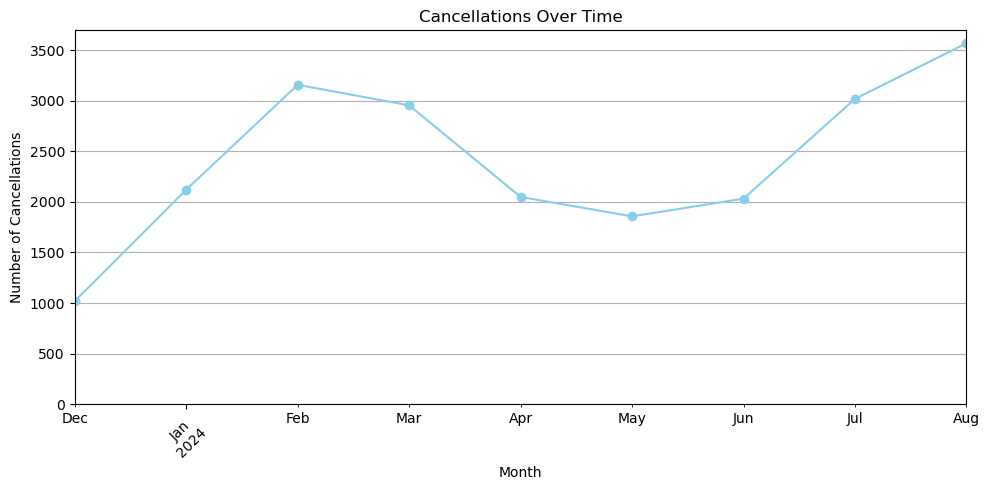

In [20]:
## Plot the number of cancellations per month using a line graph
## Filter out September data

filtered_cancellations = cancellations[cancellations['month_canceled'] < '2024-09']

# Plot the number of cancellations per month using a line graph
ax = filtered_cancellations.groupby('month_canceled').size().sort_index().plot(
    kind='line', marker='o', figsize=(10, 5), color='skyblue'
)

# Add labels and title
plt.title('Cancellations Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Set y-axis to start from 0
ax.set_ylim(0)

# Save the plot as an image
plt.tight_layout()
plt.savefig('visualizations/cancellations_over_time.png')  # Save before showing

# Display the plot
plt.show()


#### Initial Insights and Recommendations:

##### 1. December saw by far the lowest number of cancellations (1000). Maybe people stream more during Holiday Break?
##### 2. August had highest number of cancellations (3500), followed by February, July and March (each around 3000).
##### 3. January and the period between April-June had lower cancellation numbers (around 2000). 
##### 4. It would be best to have data from previous years to see if there are repeating patterns month to month
##### 5. Later, look into possible reasons that could explain why these numbers are the way they are

### 2B. Leads

In [23]:
leads.head()

,email_key,landing_page_id,campaign_name,brand,email_submitted_at
0,7157e338c8906f5c477fcefd02141862,NaN,Unwrap New Favorites,playground prime,2023-12-01 08:01:31.000 Z
1,9a37061a62575ca1b5b118f5d7b84368,NaN,Cuddle Up for Cartoon Time,playground prime,2023-12-01 08:03:30.000 Z
2,57e394df8d37acf1696bf51ba3a87481,NaN,Unwrap New Favorites,playground prime,2023-12-01 08:04:23.000 Z
3,21eae1c83af0598a5de4b7a7db7af417,NaN,Unwrap New Favorites,playground prime,2023-12-01 08:06:25.000 Z
4,3d6861e05fa3448ed414b9b37c8a4704,NaN,Unwrap New Favorites,playground prime,2023-12-01 08:10:40.000 Z


In [24]:
leads.shape

(109249, 5)

In [25]:
# Ensure 'cancelled_at' is in datetime format
leads['email_submitted_at'] = pd.to_datetime(leads['email_submitted_at'], format="%Y-%m-%d %H:%M:%S.%f Z")

# Create a new column 'month_canceled' with just the year and month
leads['month_emailed'] = leads['email_submitted_at'].dt.to_period('M')

In [26]:
leads.head()

,email_key,landing_page_id,campaign_name,brand,email_submitted_at,month_emailed
0,7157e338c8906f5c477fcefd02141862,NaN,Unwrap New Favorites,playground prime,2023-12-01 08:01:31,2023-12
1,9a37061a62575ca1b5b118f5d7b84368,NaN,Cuddle Up for Cartoon Time,playground prime,2023-12-01 08:03:30,2023-12
2,57e394df8d37acf1696bf51ba3a87481,NaN,Unwrap New Favorites,playground prime,2023-12-01 08:04:23,2023-12
3,21eae1c83af0598a5de4b7a7db7af417,NaN,Unwrap New Favorites,playground prime,2023-12-01 08:06:25,2023-12
4,3d6861e05fa3448ed414b9b37c8a4704,NaN,Unwrap New Favorites,playground prime,2023-12-01 08:10:40,2023-12


In [27]:
#Checking for missing values
leads.isnull().sum()
#Many missing values for landing_page_id

email_key                 0
landing_page_id       30745
campaign_name             0
brand                     0
email_submitted_at        0
month_emailed             0
dtype: int64

In [28]:
# Count for each column
campaign_counts = leads['campaign_name'].value_counts()
brand_counts = leads['brand'].value_counts()
month_counts = leads['month_emailed'].value_counts().sort_index()

# Display the counts
print("Campaign Name Counts:\n", campaign_counts)
print("\nBrand Counts:\n", brand_counts)
print("\nMonth Emailed Counts:\n", month_counts)

Campaign Name Counts:
 campaign_name
Cuddle Up for Cartoon Time             38503
Skip the FOMO                          28835
Shows Worth Talking About              11819
Start Streaming in Minutes              7919
Take Movie Nights to the Next Level     5136
Fan Faves & Hidden Gems                 4520
Free Trial, Endless Choices             4473
Discover New Worlds                     3329
Unwrap New Favorites                    3047
First Episode is on Us                  1668
Name: count, dtype: int64

Brand Counts:
 brand
playground prime    46547
dare network        46410
mosaic              16292
Name: count, dtype: int64

Month Emailed Counts:
 month_emailed
2023-12    12081
2024-01     9188
2024-02    10124
2024-03    15291
2024-04    14187
2024-05    10423
2024-06    10950
2024-07    13884
2024-08    13092
2024-09       29
Freq: M, Name: count, dtype: int64


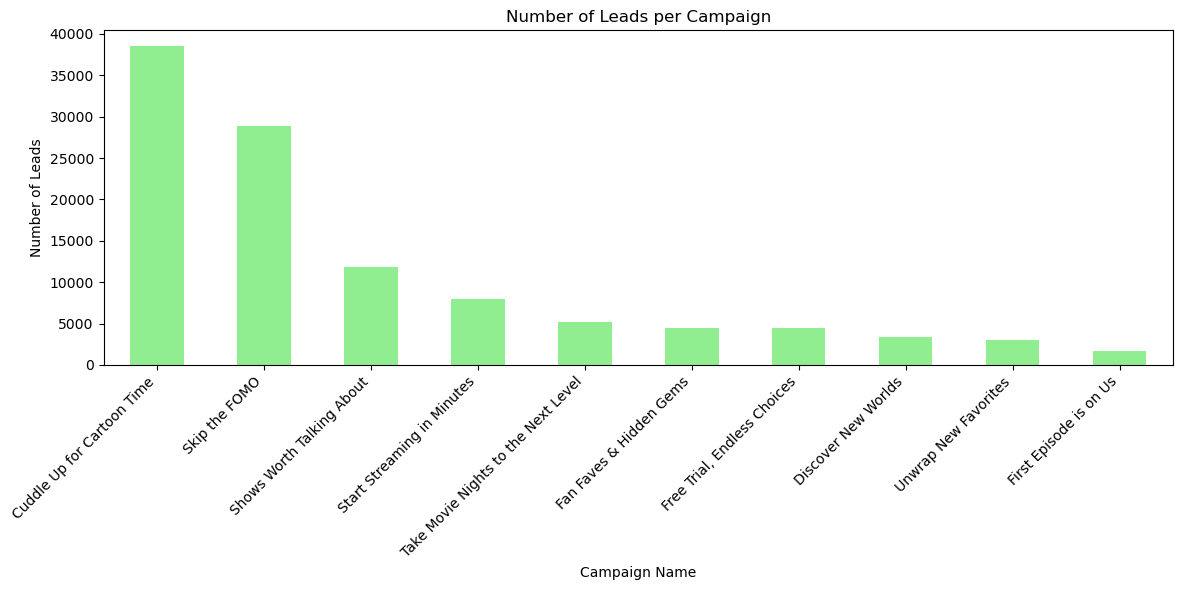

In [29]:
# Visualization for campaign_name
# Plot for campaign_name counts
plt.figure(figsize=(12, 6))
leads['campaign_name'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Number of Leads per Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('Number of Leads')
plt.xticks(rotation=45, ha='right')

# Save the plot as an image
plt.tight_layout()
plt.savefig('visualizations/campaign_name_counts.png')
plt.show()

In [30]:
#Counting number of leads per month
leads['brand'].value_counts(dropna=False)

brand
playground prime    46547
dare network        46410
mosaic              16292
Name: count, dtype: int64

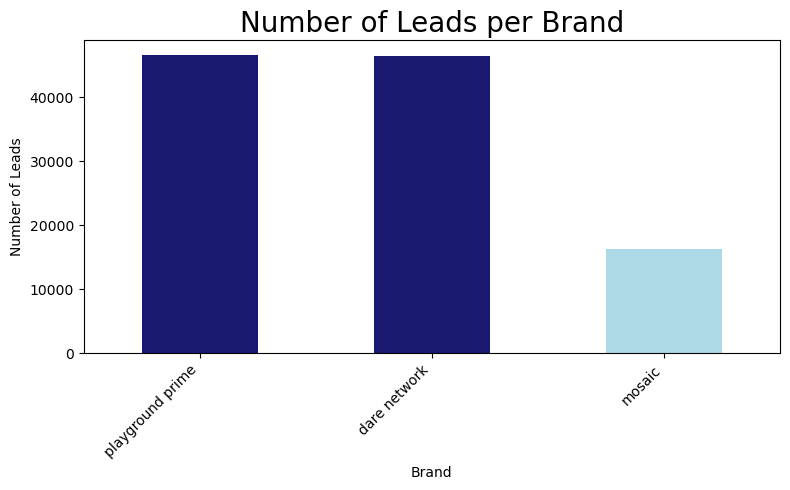

In [31]:
#Visualization for Brand counts

plt.figure(figsize=(8, 5))
leads['brand'].value_counts().plot(kind='bar', color=['midnightblue','midnightblue','lightblue'])
plt.title('Number of Leads per Brand', fontsize=20)
plt.xlabel('Brand')
plt.ylabel('Number of Leads')
plt.xticks(rotation=45, ha='right')

# Save the plot to the 'visualizations' subfolder
plt.tight_layout()
plt.savefig('visualizations/brand_counts.png')
plt.show()

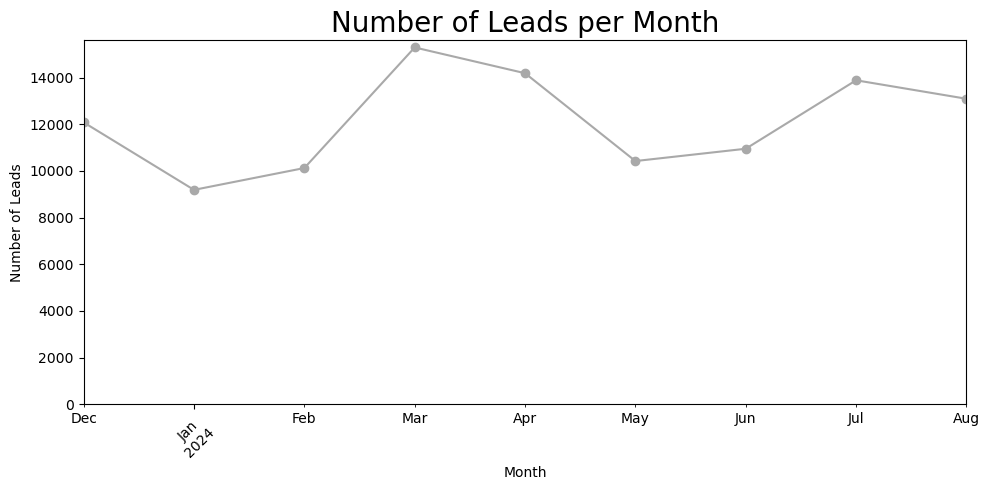

In [32]:
#Visualizations for month_emailed (for a campaign)

# Filter out September and get month counts
month_emailed_counts = leads[leads['month_emailed'] < '2024-09']['month_emailed'].value_counts().sort_index()

# Plot for month_emailed counts
plt.figure(figsize=(10, 5))
month_emailed_counts.plot(kind='line', marker='o', color='darkgrey')
plt.title('Number of Leads per Month', fontsize=20)
plt.xlabel('Month')
plt.ylabel('Number of Leads')
plt.xticks(rotation=45)

# Set y-axis to start from 0
plt.ylim(0)

# Save the plot as an image
plt.tight_layout()
plt.savefig('visualizations/month_emailed_counts.png')
plt.show()

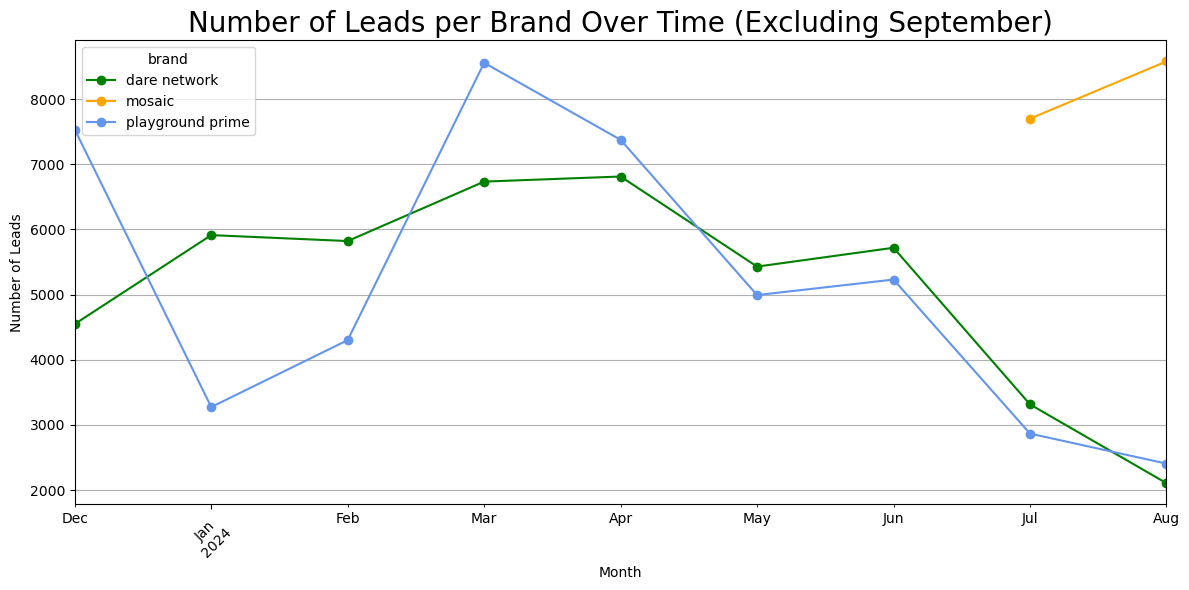

In [33]:
#### Are certain brands more popular in certain months?
plt.figure(figsize=(12, 6))

# Filter out September data
filtered_leads = leads[leads['month_emailed'] < '2024-09']

# Group by month and brand, then plot
filtered_leads.groupby(['month_emailed', 'brand']).size().unstack().plot(kind='line', marker='o', color=['green', 'orange','cornflowerblue'], ax=plt.gca())
plt.title('Number of Leads per Brand Over Time (Excluding September)', fontsize=20)
plt.xlabel('Month')
plt.ylabel('Number of Leads')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('visualizations/brand_performance_over_time.png')
plt.show()

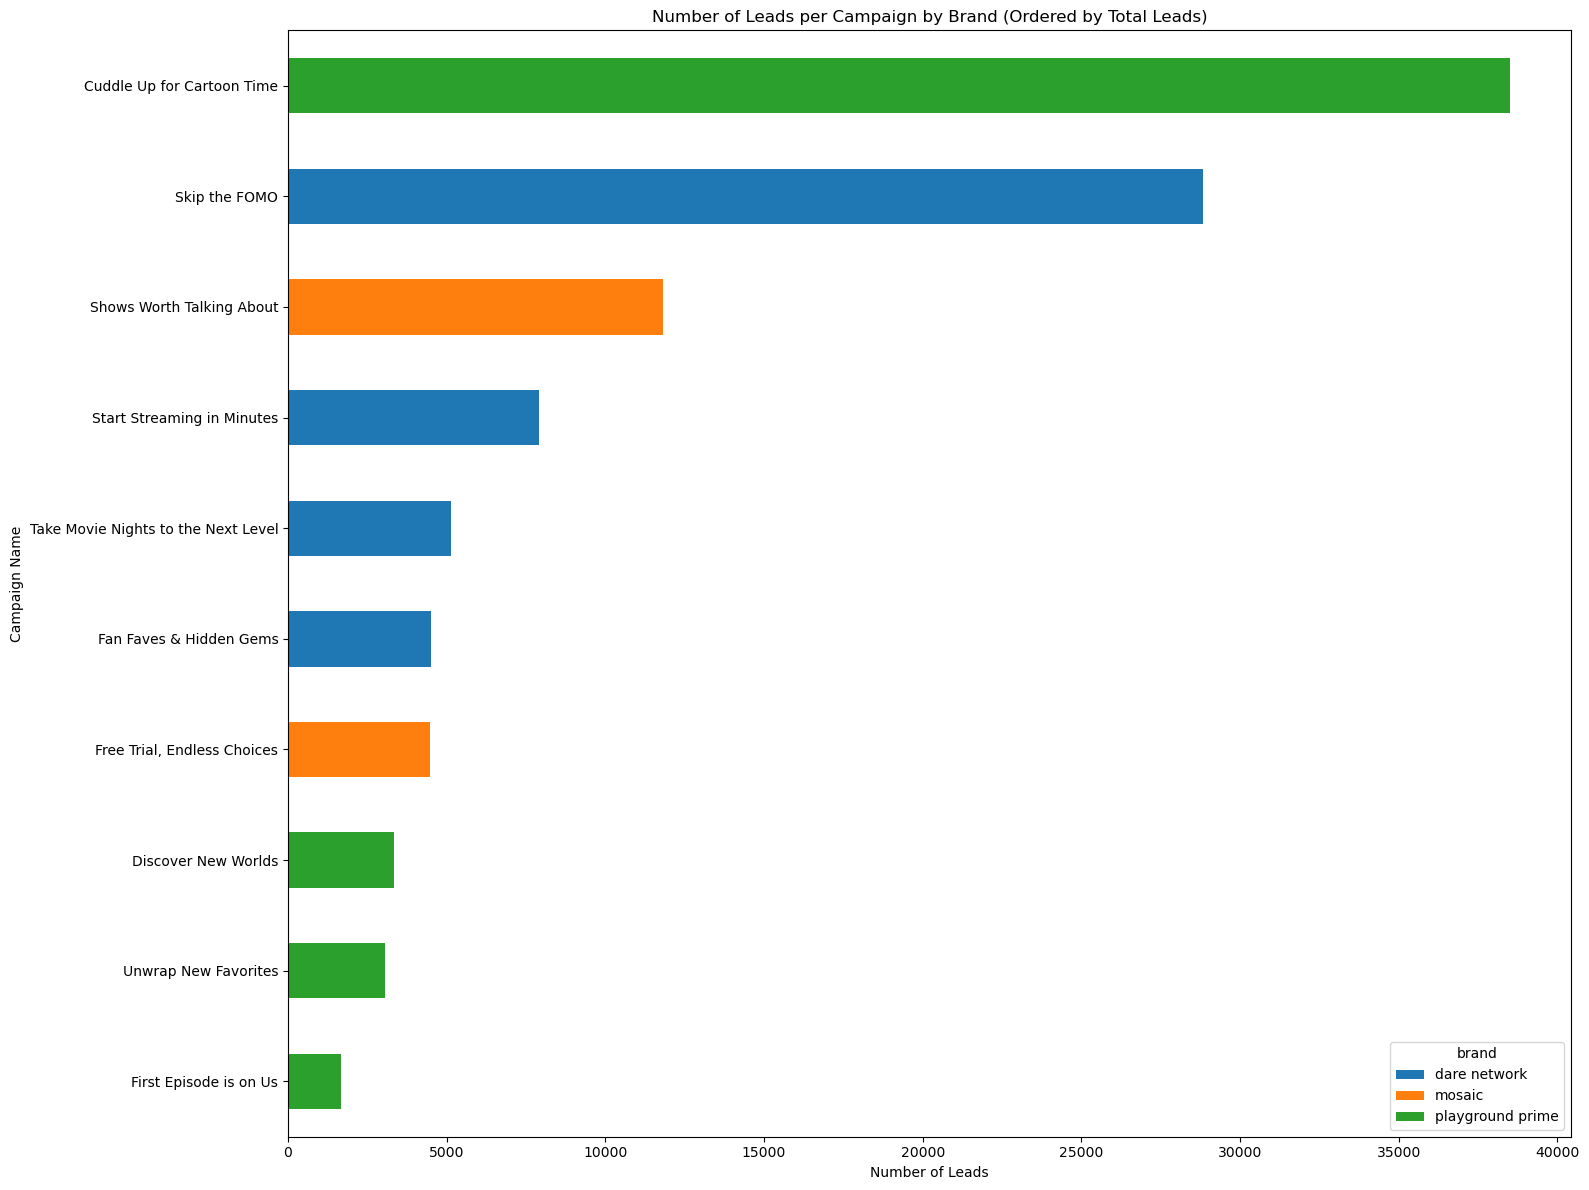

In [34]:
# Bar chart of campaign brand distribution
plt.figure(figsize=(16, 12))  # Adjust the figsize for better readability of a horizontal chart

# Group by campaign_name and brand, count the leads, and unstack the data
campaign_brand_counts = leads.groupby(['campaign_name', 'brand']).size().unstack()

# Sort the DataFrame by the total number of leads for each campaign in descending order
campaign_brand_counts['Total'] = campaign_brand_counts.sum(axis=1)
campaign_brand_counts = campaign_brand_counts.sort_values(by='Total', ascending=True).drop(columns=['Total'])

# Plot the sorted data as a horizontal bar chart
campaign_brand_counts.plot(kind='barh', stacked=True, ax=plt.gca())
plt.title('Number of Leads per Campaign by Brand (Ordered by Total Leads)')
plt.xlabel('Number of Leads')
plt.ylabel('Campaign Name')
plt.tight_layout()
plt.savefig('visualizations/campaign_brand_distribution_horizontal.png')
plt.show()

#### Initial Insights
##### 1. Mosaic brand is likely new and launched in July 2024 - it's been more successful than the other two brands in July-August
##### 2. Leads were most successful in March-April and July-August overall
##### 3. The other two brands have had declining success in leads from March-August (with a brief rise in June)
##### 4. Playground Prime had high peaks in December and March - maybe because of Xmas break and March Break for kids?

#### Initial Recommendations (must be tested first)
##### 1. Plan Playground Time leads for Holiday Break and March Break
##### 2. Continue Leads for Mosaic - see how it continues to perform throughout the year

### 2C. Trials

In [37]:
trials.head()

,email_key,subscription_key,brand,channel,subscription_interval,has_converted,subscription_price,trial_start_at,trial_end_at
0,6a602ec029c1f56c720043c565fc4a3c,de174b27b963e4be9b3c7b29caf8b5c7,playground prime,app,monthly,False,30,2023-12-02 05:00:00.000 Z,2023-12-09 05:00:00.000 Z
1,4b6a2dfbfc6918ca23c20f9fd49492b0,31208cf97c312011d9d9081080d213d9,dare network,web,annual,True,240,2023-12-02 05:00:00.000 Z,2023-12-09 05:00:00.000 Z
2,07544436003f0ff5bf8a8dfe98292b39,f7e0a7ae944e0274fcc7165a64acc1b1,dare network,app,monthly,False,30,2023-12-02 05:00:00.000 Z,2023-12-09 05:00:00.000 Z
3,c984ad64b233d02ae49bb060c627ebae,ca8d0c03d1a455f0c6931be7eb5f7295,playground prime,app,monthly,True,30,2023-12-02 05:00:00.000 Z,2023-12-09 05:00:00.000 Z
4,6d17657ac061cc0aa3935951a4d89061,7f8a2491dad787d3e8a1e71607edc76e,playground prime,app,monthly,True,30,2023-12-02 05:00:00.000 Z,2023-12-09 05:00:00.000 Z


In [38]:
trials.shape

(37634, 9)

In [39]:
#Checking for missing values
trials.isnull().sum()
#No missing values

email_key                0
subscription_key         0
brand                    0
channel                  0
subscription_interval    0
has_converted            0
subscription_price       0
trial_start_at           0
trial_end_at             0
dtype: int64

In [40]:
# Check for duplicate 'email_key' in the trials table
print("Number of duplicate email_keys in trials:", trials['email_key'].duplicated().sum())

Number of duplicate email_keys in trials: 0


In [41]:
# Ensure 'cancelled_at' is in datetime format
trials['trial_end_at'] = pd.to_datetime(trials['trial_end_at'], format="%Y-%m-%d %H:%M:%S.%f Z")

# Create a new column 'month_canceled' with just the year and month
trials['month_trial_end'] = trials['trial_end_at'].dt.to_period('M')

In [42]:
trials.head()

,email_key,subscription_key,brand,channel,subscription_interval,has_converted,subscription_price,trial_start_at,trial_end_at,month_trial_end
0,6a602ec029c1f56c720043c565fc4a3c,de174b27b963e4be9b3c7b29caf8b5c7,playground prime,app,monthly,False,30,2023-12-02 05:00:00.000 Z,2023-12-09 05:00:00,2023-12
1,4b6a2dfbfc6918ca23c20f9fd49492b0,31208cf97c312011d9d9081080d213d9,dare network,web,annual,True,240,2023-12-02 05:00:00.000 Z,2023-12-09 05:00:00,2023-12
2,07544436003f0ff5bf8a8dfe98292b39,f7e0a7ae944e0274fcc7165a64acc1b1,dare network,app,monthly,False,30,2023-12-02 05:00:00.000 Z,2023-12-09 05:00:00,2023-12
3,c984ad64b233d02ae49bb060c627ebae,ca8d0c03d1a455f0c6931be7eb5f7295,playground prime,app,monthly,True,30,2023-12-02 05:00:00.000 Z,2023-12-09 05:00:00,2023-12
4,6d17657ac061cc0aa3935951a4d89061,7f8a2491dad787d3e8a1e71607edc76e,playground prime,app,monthly,True,30,2023-12-02 05:00:00.000 Z,2023-12-09 05:00:00,2023-12


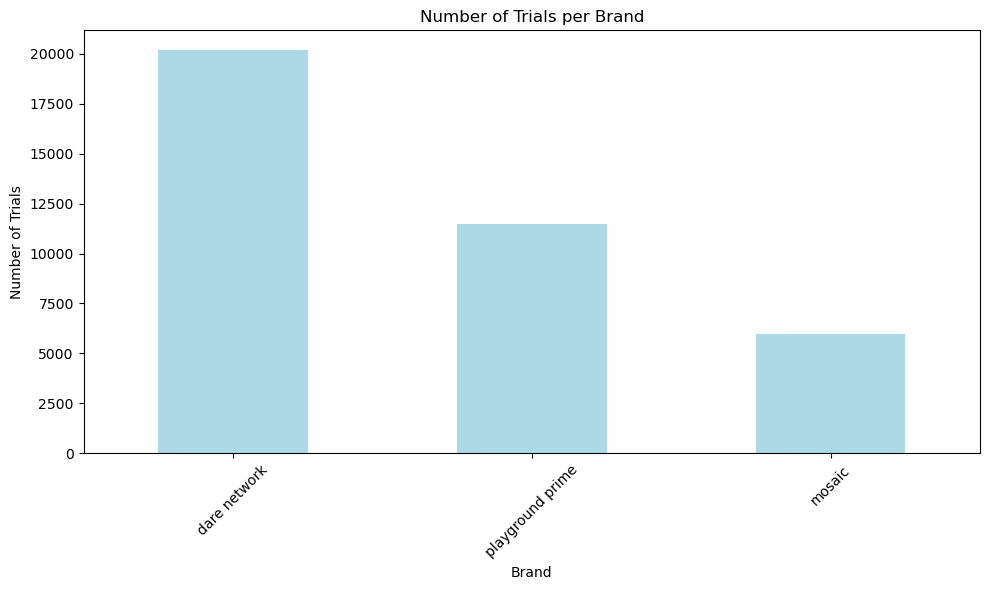

In [43]:
# Bar chart for trials per brand
# Plot for number of trials per brand
plt.figure(figsize=(10, 6))
trials['brand'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Number of Trials per Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Trials')
plt.xticks(rotation=45)

# Save the plot to the 'visualizations' subfolder
plt.tight_layout()
plt.savefig('visualizations/trials_per_brand.png')
plt.show()

In [44]:
# Check how many converted to subscription from trials by brand
trials.groupby(['brand']).size().fillna(0)

brand
dare network        20166
mosaic               5995
playground prime    11473
dtype: int64

In [45]:
# How many people converted?
print(trials['has_converted'].value_counts())

has_converted
True     26962
False    10672
Name: count, dtype: int64


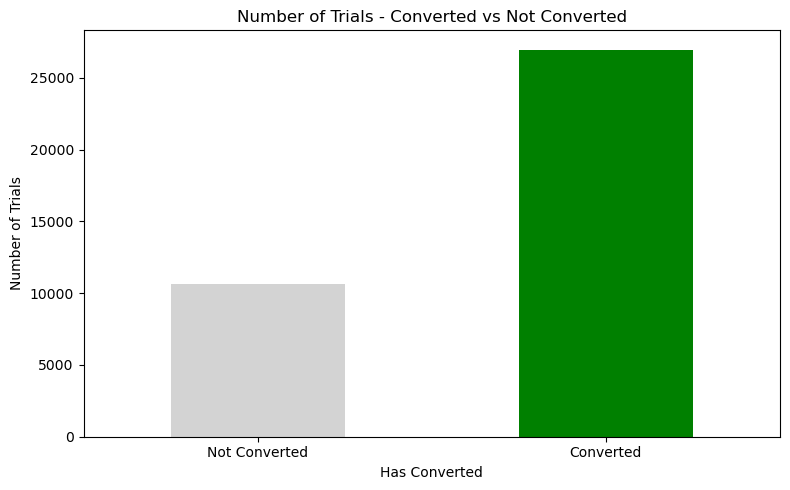

In [46]:
# Bar Chart for "has converted" counts
# Plot for has_converted counts with the correct order and labels
plt.figure(figsize=(8, 5))
trials['has_converted'].value_counts().sort_index().plot(kind='bar', color=['lightgrey', 'green'])
plt.title('Number of Trials - Converted vs Not Converted')
plt.xlabel('Has Converted')
plt.ylabel('Number of Trials')
plt.xticks([0, 1], ['Not Converted', 'Converted'], rotation=0)

# Save the plot to the 'visualizations' subfolder
plt.tight_layout()
plt.savefig('visualizations/has_converted_counts_corrected.png')
plt.show()

In [47]:
# Check how many converted to subscription from trials by brand
trials.groupby(['has_converted','brand']).size().unstack().fillna(0)

brand,dare network,mosaic,playground prime
has_converted,,,
False,5070,1667,3935
True,15096,4328,7538


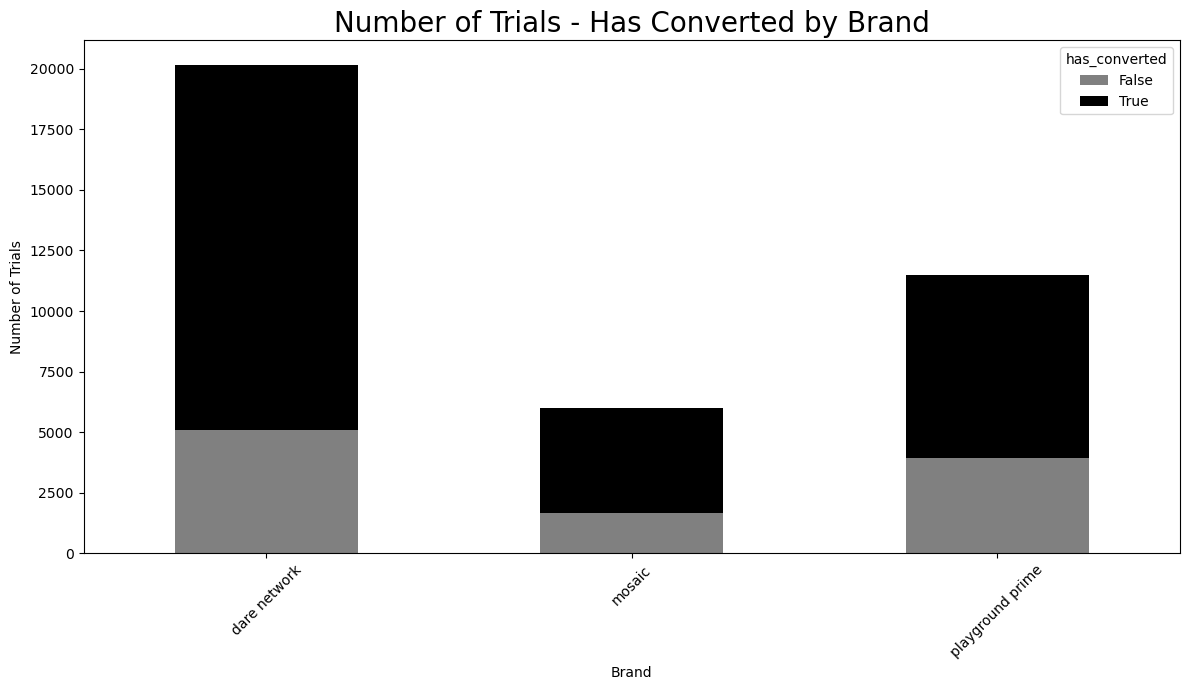

In [48]:
# Stacked Bar of Conversions by Brand
# Group by brand and has_converted, then unstack for a stacked bar chart
plt.figure(figsize=(12, 7))
trials.groupby(['brand', 'has_converted']).size().unstack().plot(kind='bar', stacked=True, ax=plt.gca(), color=['grey', 'black'])
plt.title('Number of Trials - Has Converted by Brand', fontsize=20)
plt.xlabel('Brand')
plt.ylabel('Number of Trials')
plt.xticks(rotation=45)

# Save the plot to the 'visualizations' subfolder
plt.tight_layout()
plt.savefig('visualizations/has_converted_by_brand.png')
plt.show()


In [49]:
# Base code to get the count of conversions by brand
conversion_counts = trials.groupby(['has_converted', 'brand']).size().unstack().fillna(0)

# Calculate the percentage of trials that have converted by brand
percentage_converted = (conversion_counts.loc[True] / conversion_counts.sum()) * 100

# Display the result as a percentage
print("Percentage of Trials that Have Converted by Brand:")
print(percentage_converted)

Percentage of Trials that Have Converted by Brand:
brand
dare network        74.858673
mosaic              72.193495
playground prime    65.702083
dtype: float64


#### Initial Insights and Recommendations

##### 1. Most Trials Converted to Subscriptions than not (True = 26962; False = 10672)
##### 2. Dare Network and Mosaic had higher trial conversion rates than playground prime


### 2D. Watched Videos

In [52]:
videos_watched.head()

,email_key,interaction_date,brand,video_type,genre,watched_videos
0,6a602ec029c1f56c720043c565fc4a3c,2023-12-02,playground prime,tv,comedy,4
1,6a602ec029c1f56c720043c565fc4a3c,2023-12-02,playground prime,tv,documentary,1
2,6a602ec029c1f56c720043c565fc4a3c,2023-12-02,playground prime,tv,family/kids,5
3,6a602ec029c1f56c720043c565fc4a3c,2023-12-02,playground prime,tv,scifi,5
4,6a602ec029c1f56c720043c565fc4a3c,2024-01-20,playground prime,tv,comedy,1


In [53]:
videos_watched.tail()

,email_key,interaction_date,brand,video_type,genre,watched_videos
298618,fff0037f2fd35876144a8529ffa1ab1e,2024-07-28,dare network,tv,comedy,4
298619,fff0037f2fd35876144a8529ffa1ab1e,2024-07-28,dare network,tv,drama,2
298620,fff0037f2fd35876144a8529ffa1ab1e,2024-07-28,dare network,tv,reality,1
298621,fff0037f2fd35876144a8529ffa1ab1e,2024-07-28,dare network,tv,thriller,2
298622,fff0037f2fd35876144a8529ffa1ab1e,2024-08-07,dare network,tv,comedy,3


In [54]:
videos_watched.shape

(298623, 6)

In [55]:
#Checking for missing values
videos_watched.isnull().sum()
#No missing values

email_key           0
interaction_date    0
brand               0
video_type          0
genre               0
watched_videos      0
dtype: int64

In [56]:
# Check for duplicate 'email_key' in the videos_watched table
print("Number of duplicate email_keys in videos_watched:", videos_watched['email_key'].duplicated().sum())
# Duplicate values for email_key are fine

Number of duplicate email_keys in videos_watched: 258556


In [57]:
# Count the number of videos watched by brand
brand_counts = videos_watched['brand'].value_counts()
print("Number of videos watched by brand:")
print(brand_counts)

Number of videos watched by brand:
brand
dare network        214405
playground prime     55157
mosaic               29061
Name: count, dtype: int64


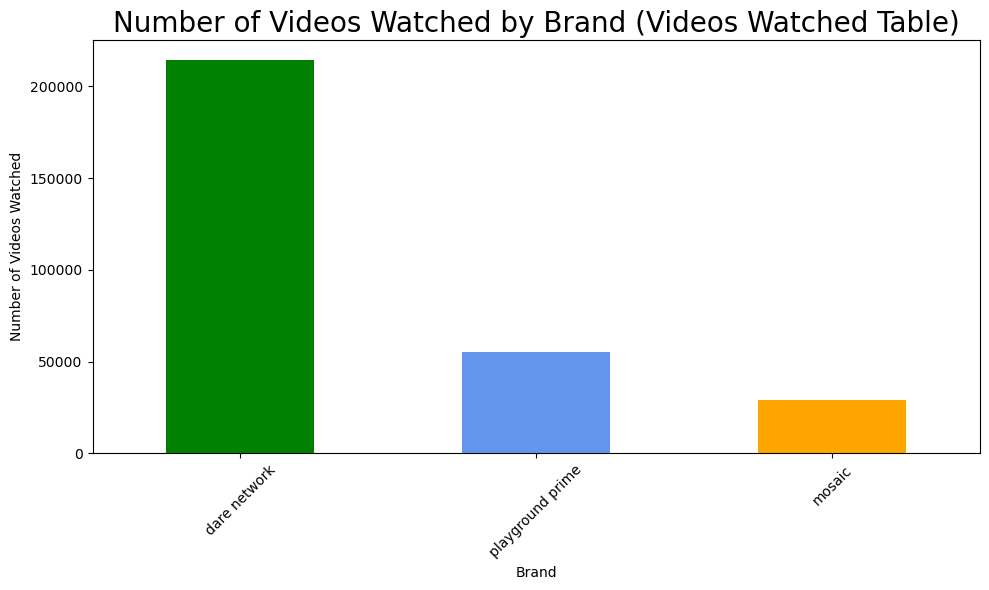

In [58]:
# Count the number of videos watched by brand in the videos_watched table
videos_watched_by_brand = videos_watched['brand'].value_counts()

plt.figure(figsize=(10, 6))
videos_watched_by_brand.plot(kind='bar', color=['green','cornflowerblue','orange'])
plt.title('Number of Videos Watched by Brand (Videos Watched Table)', fontsize=20)
plt.xlabel('Brand')
plt.ylabel('Number of Videos Watched')
plt.xticks(rotation=45)

# Save the plot to the 'visualizations' subfolder
plt.tight_layout()
plt.savefig('visualizations/videos_watched_by_brand.png')
plt.show()


In [59]:
# Count the number of videos watched by genre
genre_counts = videos_watched['genre'].value_counts()
print("Number of videos watched by genre:")
print(genre_counts)

Number of videos watched by genre:
genre
comedy              72742
reality             69145
thriller            37996
drama               31803
scifi               19695
family/kids         19663
fantasy             18129
action/adventure    14847
documentary          9552
horror               5051
Name: count, dtype: int64


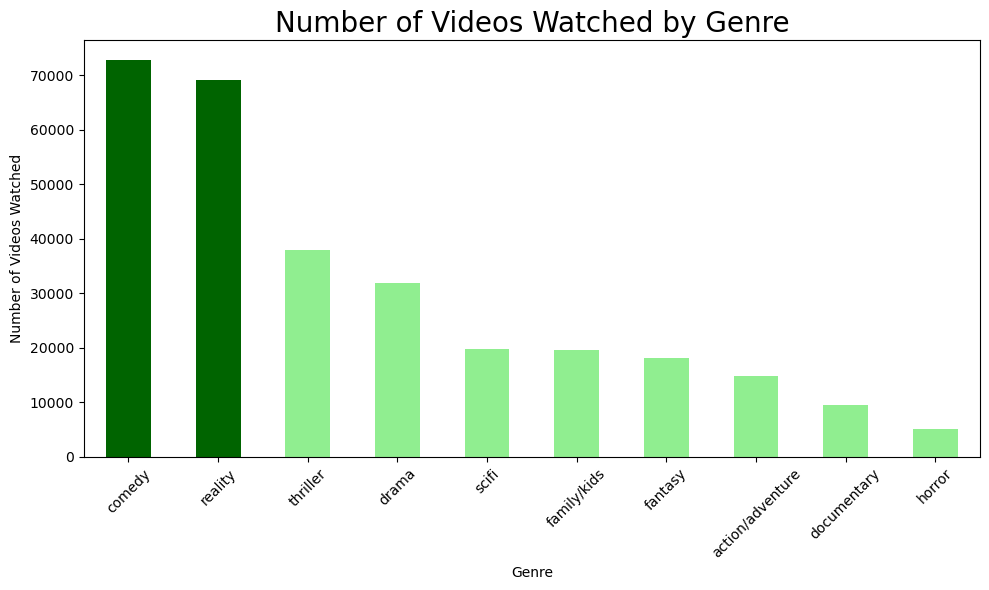

In [60]:
# Plot genre_counts
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color=['darkgreen','darkgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen'])
plt.title('Number of Videos Watched by Genre', fontsize=20)
plt.xlabel('Genre')
plt.ylabel('Number of Videos Watched')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot to the 'visualizations' subfolder
plt.savefig('visualizations/videos_watched_by_genre.png')

# Display the plot
plt.show()

In [61]:
# Ensure the 'date' column is in datetime format
videos_watched['interaction_date'] = pd.to_datetime(videos_watched['interaction_date'])

In [62]:
# Display the date range
print("Date range in the data:")
print(videos_watched['interaction_date'].min(), "to", videos_watched['interaction_date'].max())

Date range in the data:
2023-12-01 00:00:00 to 2024-09-01 00:00:00


In [63]:
# Exclude September data
filtered_videos_watched = videos_watched[videos_watched['interaction_date'] < '2024-09-01']

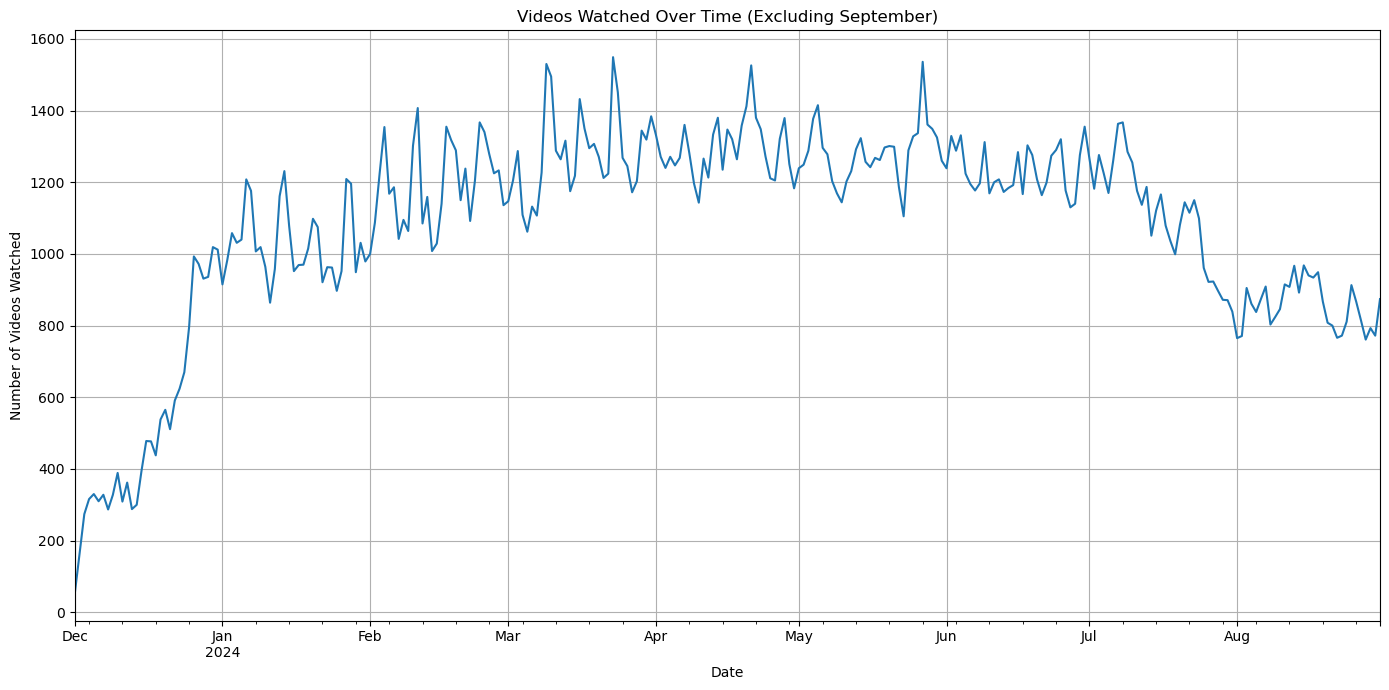

In [64]:
# Plot the number of videos watched over time, excluding September
filtered_videos_watched.groupby('interaction_date').size().plot(kind='line', figsize=(14, 7), title='Videos Watched Over Time (Excluding September)')
plt.xlabel('Date')
plt.ylabel('Number of Videos Watched')
plt.grid(True)
plt.tight_layout()

# Save the plot to the 'visualizations' subfolder
plt.savefig('visualizations/videos_watched_over_time.png')

# Display the plot
plt.show()

In [65]:
# Group by brand and genre to count the number of videos watched
genre_counts_per_brand = videos_watched.groupby(['brand', 'genre']).size().unstack().fillna(0)

In [66]:
# Sort the DataFrame by the total number of videos watched for each brand in descending order
genre_counts_per_brand_sorted = genre_counts_per_brand.loc[genre_counts_per_brand.sum(axis=1).sort_values(ascending=True).index]

In [67]:
genre_counts_per_brand_sorted

genre,action/adventure,comedy,documentary,drama,family/kids,fantasy,horror,reality,scifi,thriller
brand,,,,,,,,,,
mosaic,857.0,10766.0,174.0,5865.0,1187.0,370.0,1424.0,5296.0,1320.0,1802.0
playground prime,0.0,6246.0,9378.0,5116.0,15382.0,10446.0,534.0,0.0,7843.0,212.0
dare network,13990.0,55730.0,0.0,20822.0,3094.0,7313.0,3093.0,63849.0,10532.0,35982.0


<Figure size 1400x800 with 0 Axes>

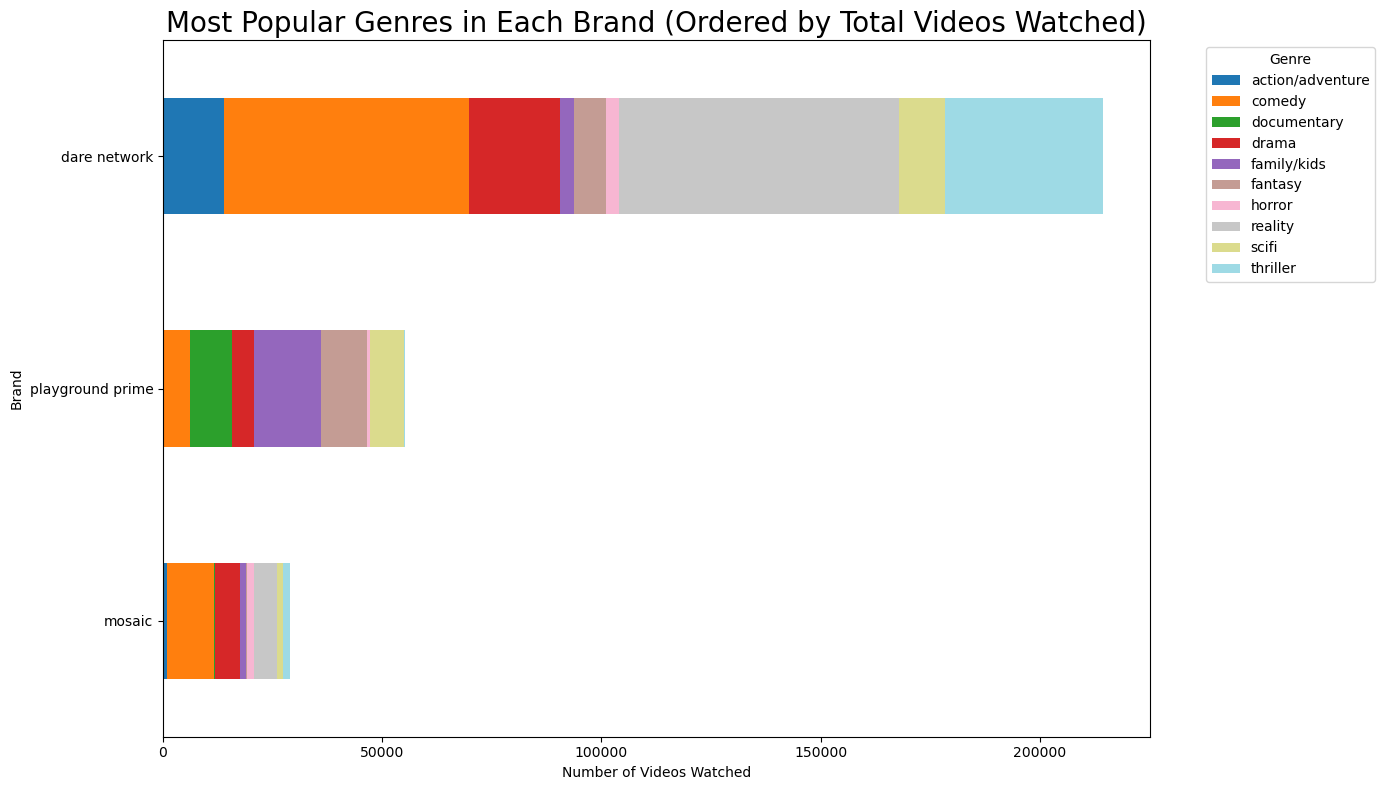

In [68]:
# Plot the most popular genres in each brand as a horizontal stacked bar chart
plt.figure(figsize=(14, 8))
genre_counts_per_brand_sorted.plot(kind='barh', stacked=True, colormap='tab20', figsize=(14, 8))
plt.title('Most Popular Genres in Each Brand (Ordered by Total Videos Watched)', fontsize=20)
plt.ylabel('Brand')
plt.xlabel('Number of Videos Watched')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot to the 'visualizations' subfolder
plt.tight_layout()
plt.savefig('visualizations/popular_genre_by_brand.png')
plt.show()

### 3. User Engagement Factors for Dare Network

In [71]:
# Merge 'videos_watched' and 'trials' using inner join on 'email_key'; include relevant columns
combined_df = pd.merge(
    videos_watched,
    trials[['email_key', 'has_converted', 'brand', 'month_trial_end']],
    on='email_key',
    how='inner'
)

In [72]:
combined_df.head()

,email_key,interaction_date,brand_x,video_type,genre,watched_videos,has_converted,brand_y,month_trial_end
0,6a602ec029c1f56c720043c565fc4a3c,2023-12-02,playground prime,tv,comedy,4,False,playground prime,2023-12
1,6a602ec029c1f56c720043c565fc4a3c,2023-12-02,playground prime,tv,documentary,1,False,playground prime,2023-12
2,6a602ec029c1f56c720043c565fc4a3c,2023-12-02,playground prime,tv,family/kids,5,False,playground prime,2023-12
3,6a602ec029c1f56c720043c565fc4a3c,2023-12-02,playground prime,tv,scifi,5,False,playground prime,2023-12
4,6a602ec029c1f56c720043c565fc4a3c,2024-01-20,playground prime,tv,comedy,1,False,playground prime,2023-12


In [73]:
# Rename the 'brand' column from the trials table to 'trial_brand'
combined_df.rename(columns={'brand_y': 'trial_brand', 'brand_x': 'video_brand'}, inplace=True)

In [74]:
# Ensure 'interaction_date' is in datetime format
combined_df['interaction_date'] = pd.to_datetime(combined_df['interaction_date'])

In [75]:
# Create a new column for the month of the interaction date
combined_df['month_interaction'] = combined_df['interaction_date'].dt.to_period('M')  # This will show YYYY-MM format

In [76]:
combined_df.head()

,email_key,interaction_date,video_brand,video_type,genre,watched_videos,has_converted,trial_brand,month_trial_end,month_interaction
0,6a602ec029c1f56c720043c565fc4a3c,2023-12-02,playground prime,tv,comedy,4,False,playground prime,2023-12,2023-12
1,6a602ec029c1f56c720043c565fc4a3c,2023-12-02,playground prime,tv,documentary,1,False,playground prime,2023-12,2023-12
2,6a602ec029c1f56c720043c565fc4a3c,2023-12-02,playground prime,tv,family/kids,5,False,playground prime,2023-12,2023-12
3,6a602ec029c1f56c720043c565fc4a3c,2023-12-02,playground prime,tv,scifi,5,False,playground prime,2023-12,2023-12
4,6a602ec029c1f56c720043c565fc4a3c,2024-01-20,playground prime,tv,comedy,1,False,playground prime,2023-12,2024-01


In [77]:
# Export the combined DataFrame to a CSV file
combined_df.to_csv(os.path.join(path, 'data', 'combined_videos_trials.csv'), index=False)